# Tarea 2
Daniel Alejandro Martínez Castro

## Enunciado

### Download Images
In case of using Google Collab

In [2]:
import gdown

drive_id = '1GmzxuvKXpjb_uXMZcH4RfSzfoQXHnOmv'
output = './'
gdown.download(id=drive_id, output=output)

Downloading...
From: https://drive.google.com/uc?id=1GmzxuvKXpjb_uXMZcH4RfSzfoQXHnOmv
To: /home/daniel/tareas_imagenes/Procesamiento-de-Imagenes/imgs.zip
100%|██████████| 3.13M/3.13M [00:00<00:00, 66.1MB/s]


'./imgs.zip'

In [3]:
!unzip imgs.zip

Archive:  imgs.zip
  inflating: imgs/star.jpg           
  inflating: imgs/kneePD.png         
  inflating: imgs/waterfall.tif      
  inflating: imgs/car.jpg            


## 1. "waterfall.tif"

### A)
Grafique el histograma de la imagen. Sin realizar ninguna operacion, describa como una ecualizacion de histograma mejorarıa
a la imagen. Justifique su respuesta.

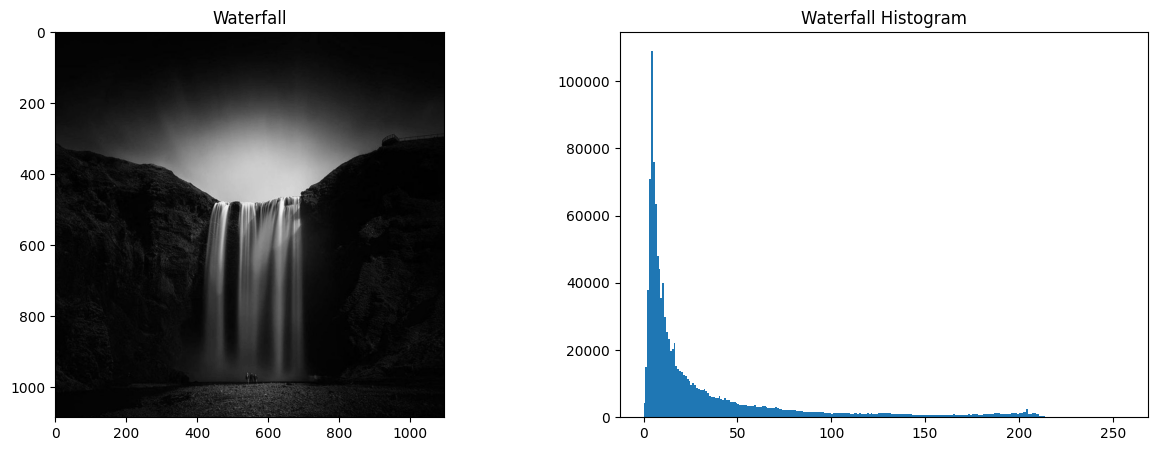

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

original_img = cv.imread("imgs/waterfall.tif", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Waterfall')
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Waterfall Histogram')
plt.hist(original_img.flatten(),256,[0,256])

plt.show()

 ### B)
 Aplique ecualización de histograma a la imagen. Muestre y comente los resultados.

In [5]:
eq_img = cv.equalizeHist(original_img)

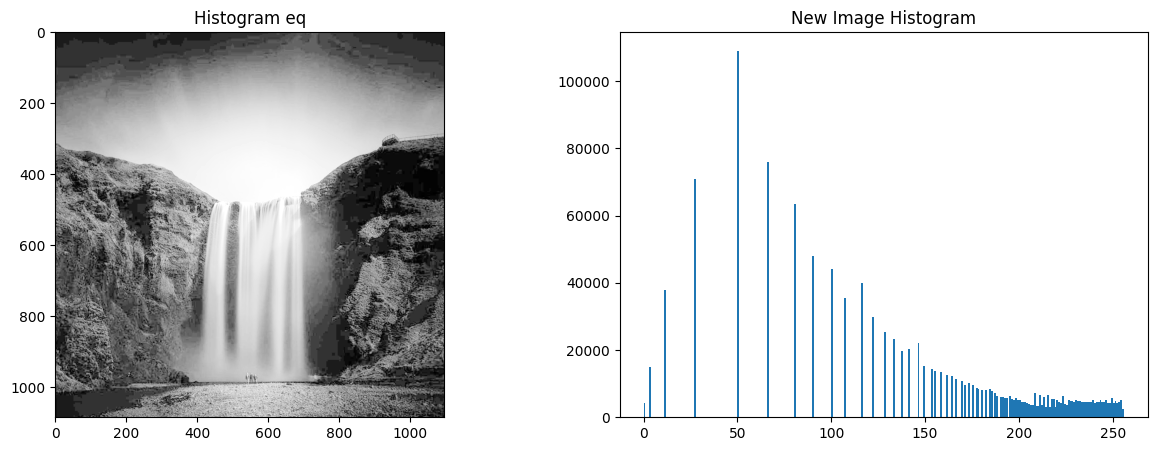

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Histogram eq')
plt.imshow(eq_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('New Image Histogram')
plt.hist(eq_img.flatten(),256,[0,256])

plt.show()

### C)
Aplique una especificación de histograma a la imagen, utilizando
un histograma de referencia que decrezca linealmente y otro que
crezca linealmente. Compare los resultados, y escoja el que le
parezca que mejora la imagen, justificando su respuesta.

In [13]:
import numpy as np

def hist_equalization(image, asc=True):

    if asc:
        hist = np.linspace(0, 255, 256)
        hist = (cv.normalize(hist, hist).flatten() * image.size).astype(np.uint32)
    else:
        hist = np.linspace(255, 0, 256)
        hist = (cv.normalize(hist, hist).flatten() * image.size).astype(np.uint32)

    bins = np.linspace(0, 255, 256)

    cdf = hist.cumsum()

    cdf_normalized = cdf / float(cdf.max())

    #equalized_image = np.interp(image.flatten(), bins, cdf_normalized * 255)
    equalized_image = np.interp(image, cdf_normalized *255, bins)

    equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)

    #equalized_image = cv.LUT(image, equalized_image.astype(np.uint8))

    return equalized_image

#### Linearly decreasing histogram

In [14]:
desc_img = hist_equalization(original_img, asc=False)

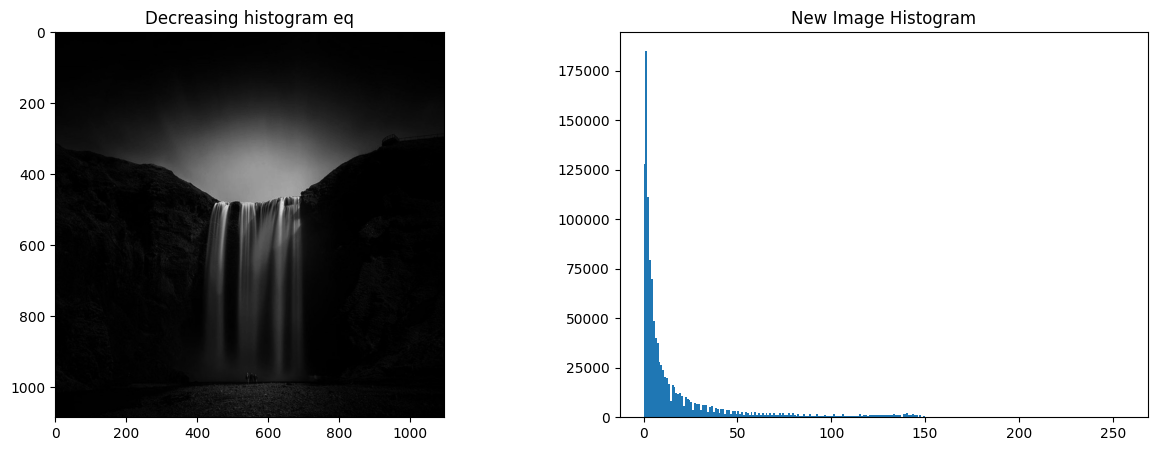

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Decreasing histogram eq')
plt.imshow(desc_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('New Image Histogram')
plt.hist(desc_img.flatten(),256,[0,256])

plt.show()

#### Linearly ascending histogram

In [ ]:
asc_img = hist_equalization(original_img, asc=True)

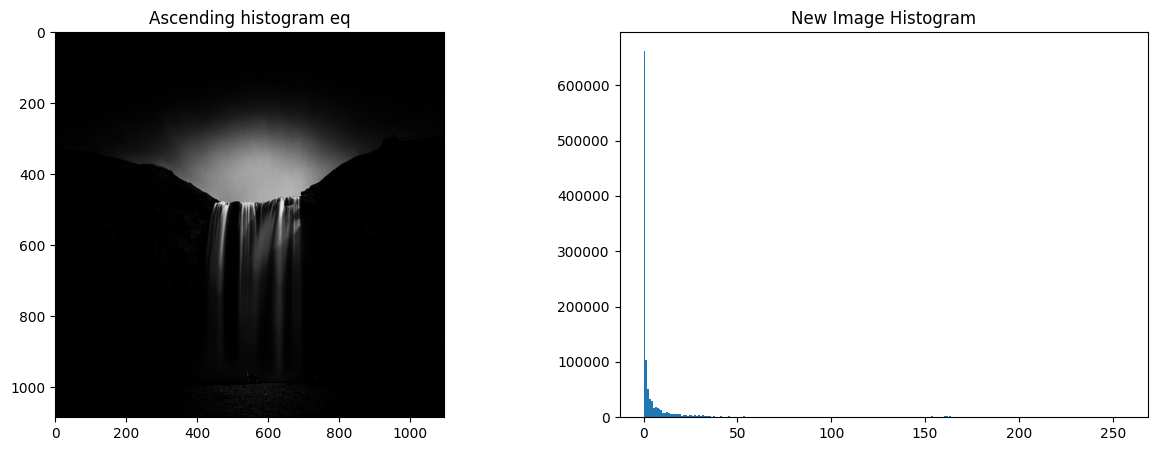

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Ascending histogram eq')
plt.imshow(asc_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('New Image Histogram')
plt.hist(asc_img.flatten(),256,[0,256])

plt.show()

### D)
Aplique a la imagen una transformación de histograma localizado
para mejorar la imagen. Reporte los parámetros utilizados en su
resultado. Comente brevemente por qué escogío esos parámetros.

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(original_img)

#futute work tune hyperparamenters

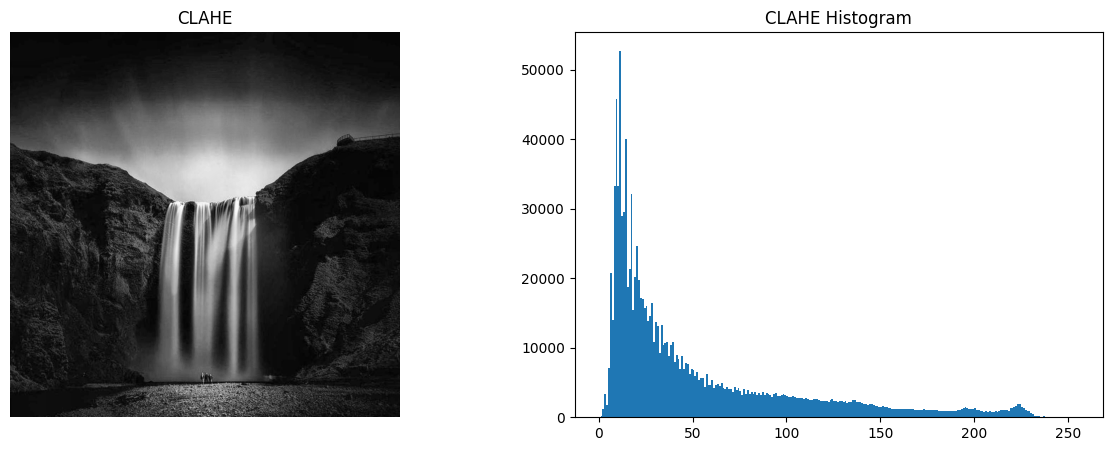

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('CLAHE')
plt.imshow(clahe_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE Histogram')
plt.hist(clahe_img.flatten(),256,[0,256])

plt.show()

### E)
Compare y discuta los resultados obtenidos en b), c) y d). A su
criterio, con cual resultado obtiene la mejor imagen? Justifique.

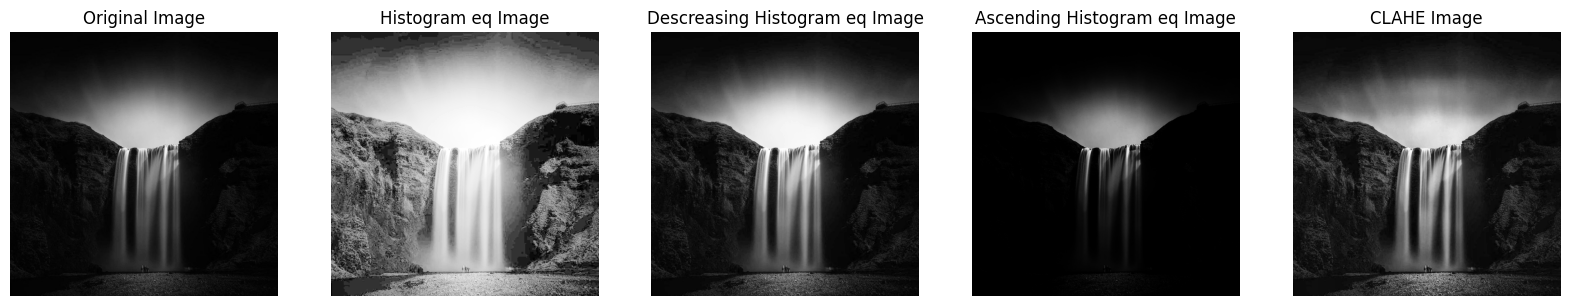

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(original_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Histogram eq Image')
plt.imshow(eq_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Descreasing Histogram eq Image')
plt.imshow(desc_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Ascending Histogram eq Image')
plt.imshow(asc_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('CLAHE Image')
plt.imshow(clahe_img, cmap='gray')
plt.axis('off')

plt.show()

## "Car.jpg"

Considere la imagen car.jpg. Esta es una imagen RGB, o sea, que tiene
3 canales de colores: rojo, verde y azul respectivamente. El objetivo
de esta pregunta es aislar el automóvil azul del fondo de la imagen,
únicamente mediante operaciones de intensidad.

### A)
Muestre la imagen de cada canal RGB del archivo original. Debería ver imágenes en blanco y negro. Describa lo que ve en cada
canal, y fundamente como podría aislar el automóvil del resto de la imagen

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original_img = cv.imread("imgs/car.jpg")
original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)

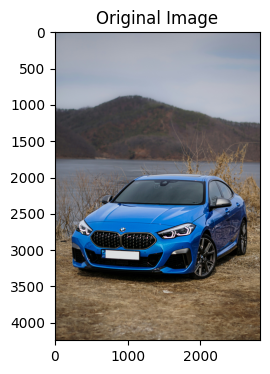

In [51]:
plt.figure(figsize=(6, 4))
plt.imshow(original_img)
plt.axis('on')
plt.title('Original Image')
plt.show()

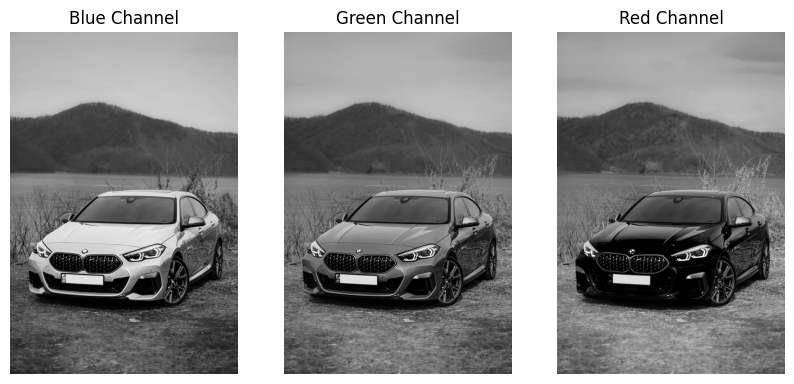

In [52]:
red_channel, green_channel, blue_channel = cv.split(original_img)

plt.figure(figsize=(10, 5.5))

plt.subplot(1, 3, 1)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.show()

### B)
Realice operaciones de intensidad en el canal azul de la imagen, de forma que se retenga la mayoría del automóvil y se pueda eliminar el fondo. Reporte los valores que utilizó para las operaciones de intensidad, y muestre la curva de la función de transferencia, es decir, la curva de la intensidad de entrada frente a salida.

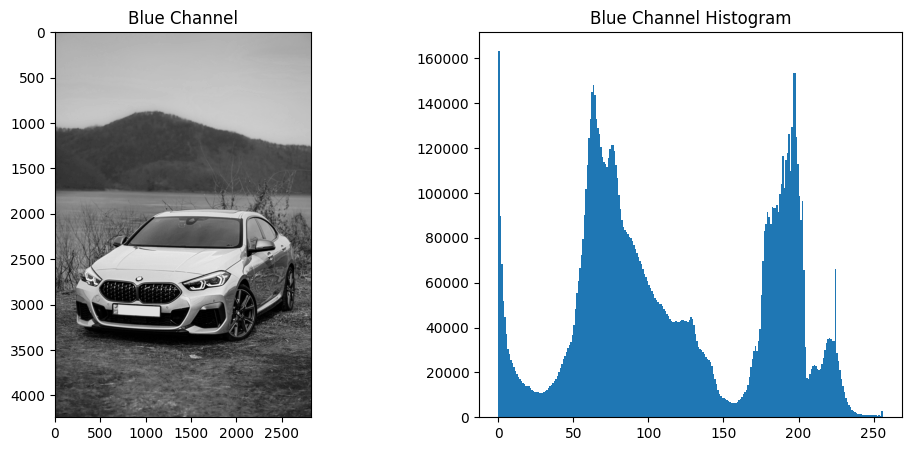

In [73]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.subplot(1, 2, 2)
plt.hist(blue_channel.flatten(),256,[0,256])
plt.title('Blue Channel Histogram')

plt.show()

In [189]:
ret, blue_adjusted = cv.threshold(blue_channel,150,255,cv.THRESH_TOZERO)

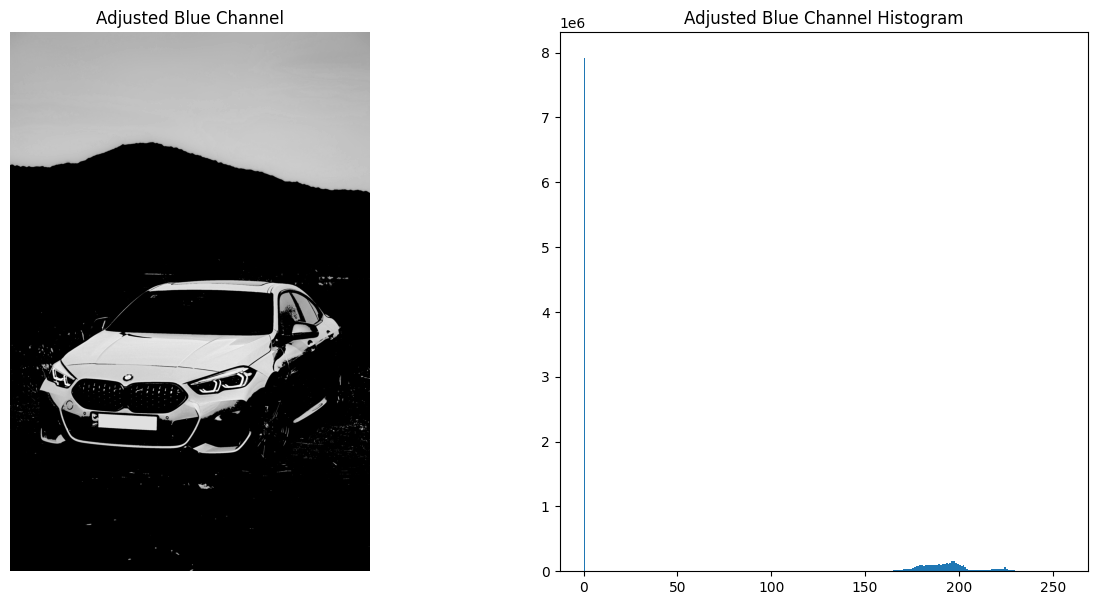

In [190]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(blue_adjusted, cmap='gray')
plt.title('Adjusted Blue Channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(blue_adjusted.flatten(),256,[0,256])
plt.title('Adjusted Blue Channel Histogram')

plt.show()

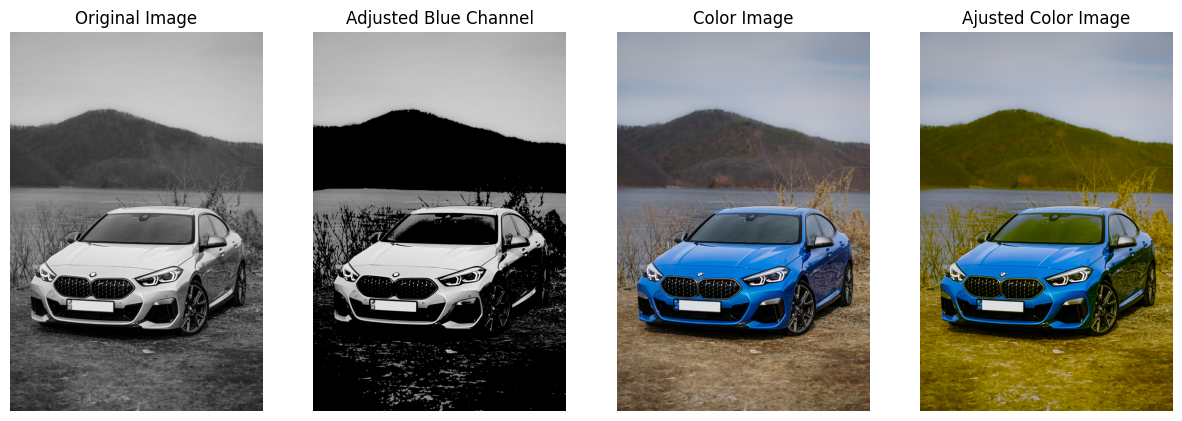

In [79]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(blue_channel, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blue_adjusted, cmap='gray')
plt.title('Adjusted Blue Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_adjusted_merged_img)
plt.title('Ajusted Color Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(original_img)
plt.title('Color Image')
plt.axis('off')

plt.show()

### C)

In [132]:
_, thresholded_blue = cv.threshold(blue_channel, 100, 255, cv.THRESH_BINARY)

# Apply the thresholded blue channel as a mask to the original image
masked_image = cv.bitwise_and(original_img, original_img, mask=thresholded_blue)

modified_image = np.copy(original_img)
modified_image[:,:,0] = masked_image

ValueError: could not broadcast input array from shape (4241,2827,3) into shape (4241,2827)

In [129]:
plt.figure()

plt.imshow(masked_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.show

NameError: name 'masked_image' is not defined

<Figure size 640x480 with 0 Axes>

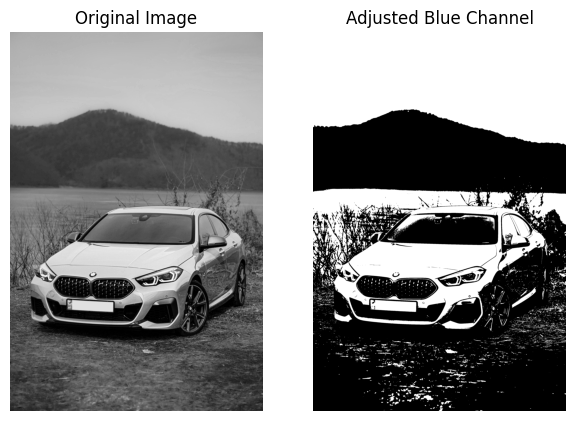

In [126]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(blue_channel, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Adjusted Blue Channel')
plt.axis('off')

plt.show()

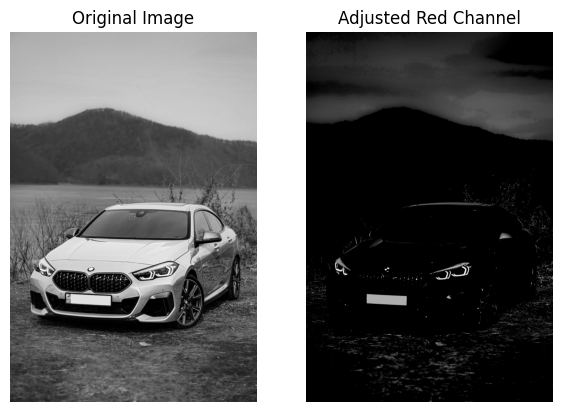

In [ ]:
r_adjusted = r.point(lambda p: p - 100)

plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
plt.imshow(b, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(r_adjusted, cmap='gray')
plt.title('Adjusted Red Channel')
plt.axis('off')

plt.show()

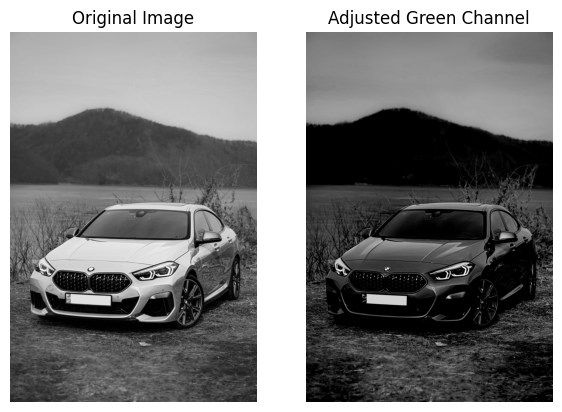

In [ ]:
g_adjusted = g.point(lambda p: p - 75)

plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
plt.imshow(b, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(g_adjusted, cmap='gray')
plt.title('Adjusted Green Channel')
plt.axis('off')

plt.show()

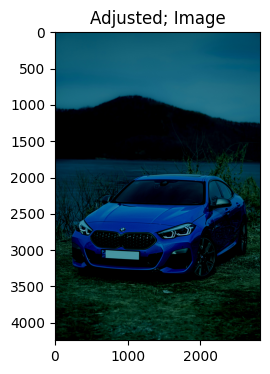

In [ ]:
adjusted_im = Image.merge('RGB', (r_adjusted, g_adjusted, b_adjusted))
plt.figure(figsize=(6, 4))
plt.imshow(adjusted_im)
plt.axis('on')
plt.title('Adjusted Image')
plt.show()

## 3. "KneePD.png"
Las imagenes de Resonancia Magnética (MRI) sufren numerosos artefactos. Uno de ellos ocurre cuando se utilizan distintas bobinas para captar la señal del cuerpo, y no se modela correctamente la sensibilidad de estas bobinas. Esto puede introducir artefactos como pérdida de señal, o cambios de intensidades en ciertas regiones de la imagen. Cargue la imagen "kneePD.png", visualícela y obsérvela de cerca. Se trata de una imagen en que se ha exagerado el efecto de modelar incorrectamente la sensibilidad de las bobinas, y se demuestra por el hecho de que la parte izquierda de la imagen es más brillante que la parte derecha. Idealmente, los hemisferios izquierdo y derecho deberían tener patrones de intensidad simétricos y ser similares en brillo.

### A)
Realice las siguientes transformaciones de intensidad a kneePD:  
• Transformación lineal a trozos  
• Ecualización de histograma  
• Ecualización de histograma adaptiva (local)  
Describa cada una de ellas, muestre sus resultados en comparación a la imagen original y comente.


In [216]:
original_img = cv.imread('imgs/kneePD.png', cv.IMREAD_GRAYSCALE)

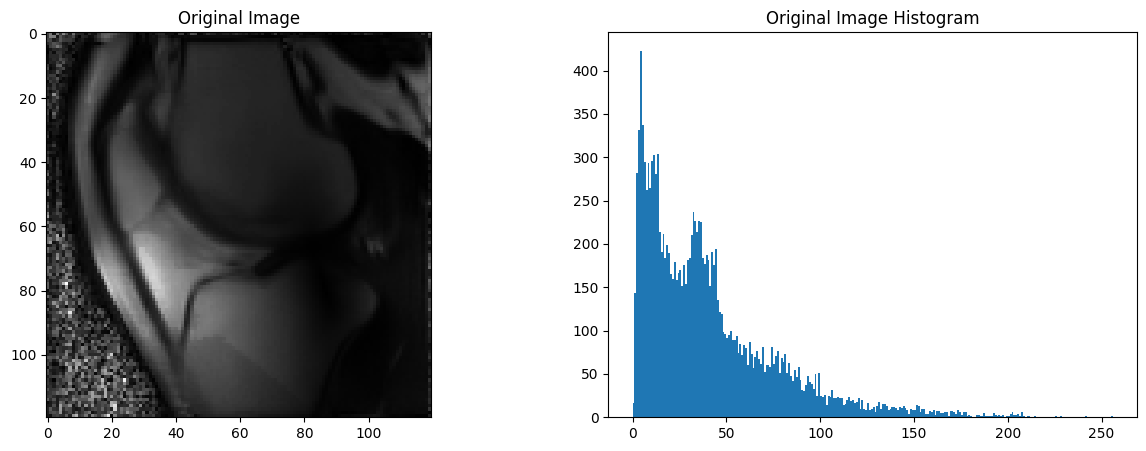

In [268]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Original Image Histogram')
plt.hist(original_img.flatten(), 256, [0, 256])

plt.show()

In [263]:
hist_eq_img = cv.equalizeHist(original_img)

_, thresholded_img = cv.threshold(original_img, 50, 255, cv.THRESH_TOZERO)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(original_img)

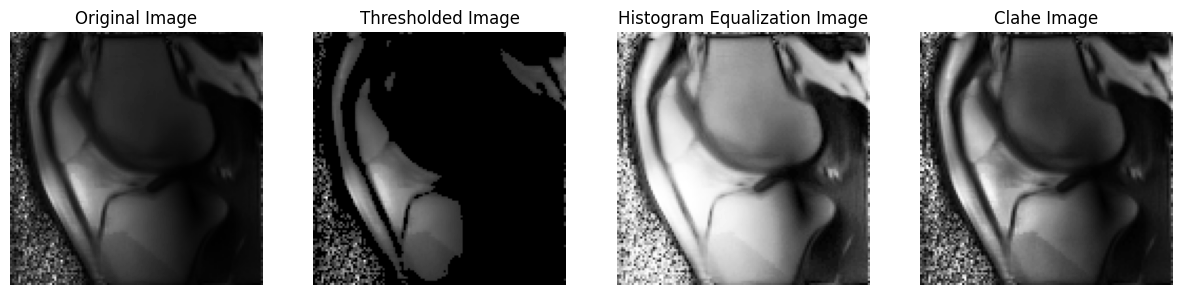

In [265]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(original_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Histogram Equalization Image')
plt.imshow(hist_eq_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Clahe Image')
plt.imshow(clahe_img, cmap='gray')
plt.axis('off')

plt.show()

### C)
Calcule el histograma de la imagen original y los histogramas de
las tres imágenes transformadas. Comp´arelos y comenta la información sobre las imágenes que está proporcionando cada uno de
los histogramas.

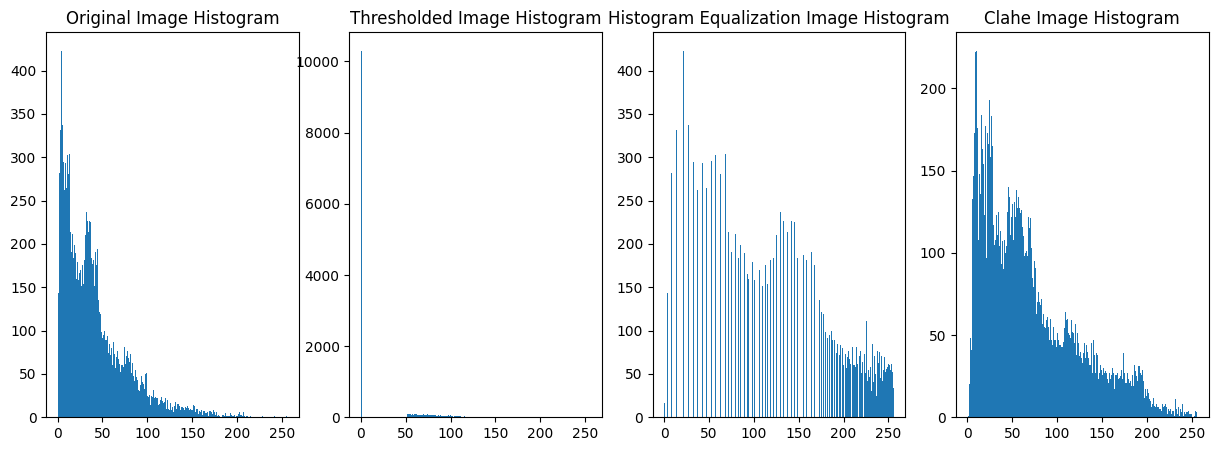

In [266]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image Histogram')
plt.hist(original_img.flatten(),256,[0,256])

plt.subplot(1, 4, 2)
plt.title('Thresholded Image Histogram')
plt.hist(thresholded_img.flatten(),256,[0,256])

plt.subplot(1, 4, 3)
plt.title('Histogram Equalization Image Histogram')
plt.hist(hist_eq_img.flatten(),256,[0,256])

plt.subplot(1, 4, 4)
plt.title('Clahe Image Histogram')
plt.hist(clahe_img.flatten(),256,[0,256])

plt.show()

### 4)
Proponga otra transformación de histograma, con la referencia que usted prefiera. Compare el resultado con la imagen que escogió en b), y justifique si la nueva ecualización mejoró o empeoró el resultado.


In [269]:
#code here

## Parte 4


In [ ]:
star_img = cv.imread('imgs/star.jpg')
star_img.shape

(3421, 5160, 3)

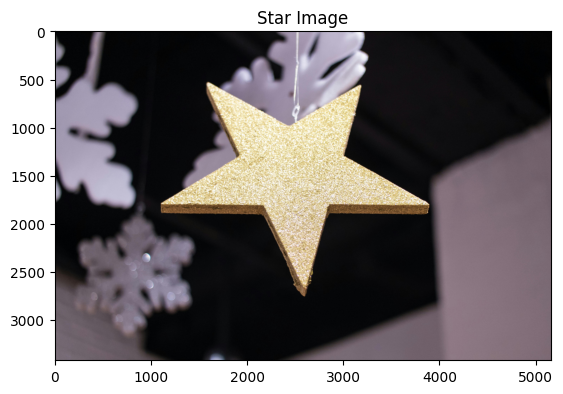

In [ ]:
plt.imshow(cv.cvtColor(star_img, cv.COLOR_BGR2RGB))
plt.title('Star Image')
plt.show()